<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/celeb_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
data=np.load('/content/data_celeba.npz')


In [24]:
x_data=np.load('/content/X_data.npy')

In [25]:
y_data=np.load('/content/Y_data.npy')

In [58]:
X=x_data

In [59]:
y=y_data

In [60]:
y_gender=y[:,0]

In [61]:
y_smile=y[:,1]

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y_gender, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 72, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (72, 59, 3)))
model.add(Conv2D(filters = 72, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 144, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 144, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 288, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 288, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [64]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [65]:
history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
44/44 [==============================] - 166s 4s/step - loss: 0.6494 - acc: 0.6057 - val_loss: 0.5236 - val_acc: 0.7750
Epoch 2/15
44/44 [==============================] - 163s 4s/step - loss: 0.5084 - acc: 0.7507 - val_loss: 0.4910 - val_acc: 0.7533
Epoch 3/15
44/44 [==============================] - 163s 4s/step - loss: 0.4497 - acc: 0.7793 - val_loss: 0.4698 - val_acc: 0.7783
Epoch 4/15
44/44 [==============================] - 164s 4s/step - loss: 0.4017 - acc: 0.8193 - val_loss: 0.4385 - val_acc: 0.7950
Epoch 5/15
44/44 [==============================] - 163s 4s/step - loss: 0.3556 - acc: 0.8479 - val_loss: 0.3982 - val_acc: 0.8083
Epoch 6/15
44/44 [==============================] - 165s 4s/step - loss: 0.2989 - acc: 0.8857 - val_loss: 0.3695 - val_acc: 0.8283
Epoch 7/15
44/44 [==============================] - 165s 4s/step - loss: 0.2357 - acc: 0.9064 - val_loss: 0.3475 - val_acc: 0.8400
Epoch 8/15
44/44 [==============================] - 164s 4s/step - loss: 0.1997 - a

---x테스트---


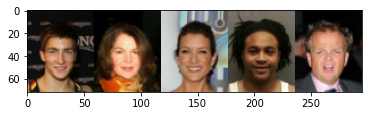

---y test value----
[1 0 0 1 1]
---y 예측값 value
1 male
0 female
0 female
1 male
1 male


In [68]:
# 테스트데이터셋
import matplotlib.pyplot as plt

y_pred=model.predict(x_val[:5])

print('---x테스트---')
plt.imshow(np.hstack(x_val[:5]))
plt.show()

print('---y test value----')
print(y_val[:5])

class_names=['female','male']
print('---y 예측값 value')
for i in y_pred:
  print(np.argmax(i),class_names[np.argmax(i)])
